## Problem 3 (TSP)
The code below implements simulated annealing for both the basic TSP and the constrained TSP. We provide three test cases for both implementations. Drawings of the graphs for each of the test cases are shown and labeled below for ease of reference.

Pseudocode for the model and its design are included in the earlier parts of the problem.
$$$$

<div>
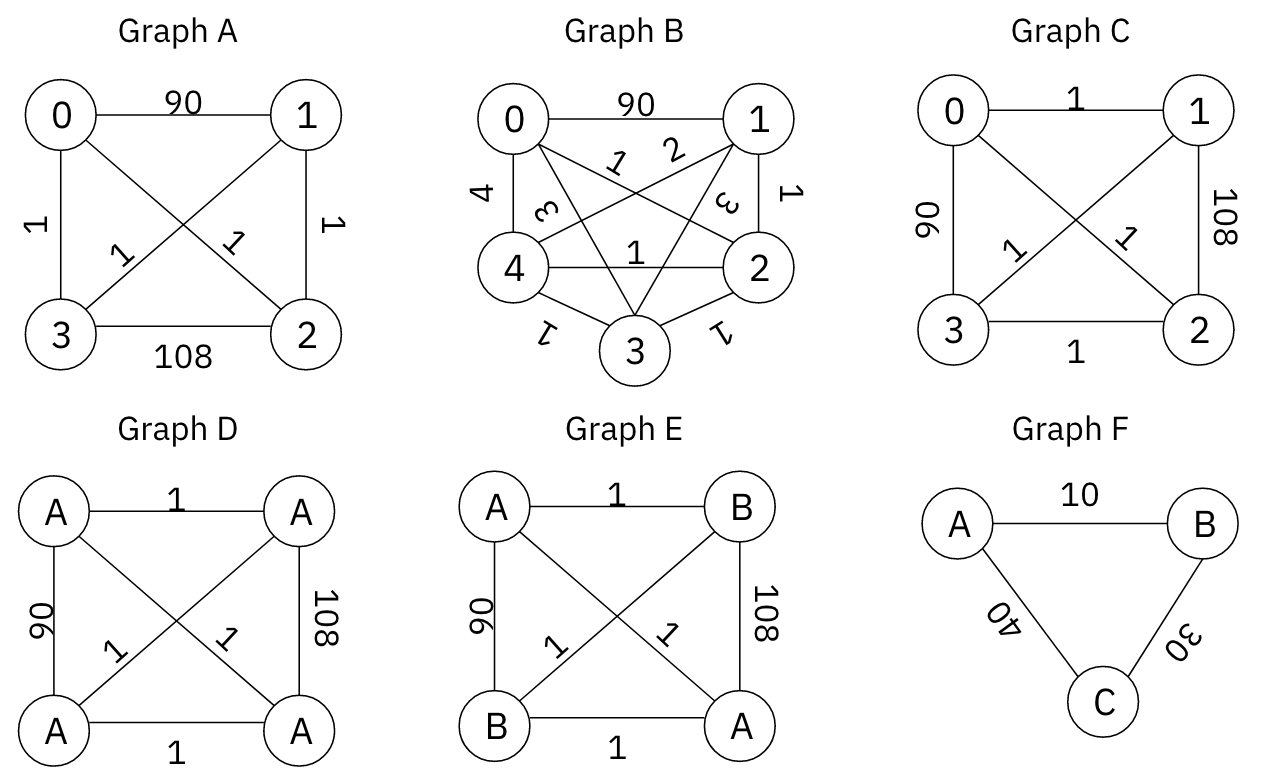
</div>

### Known solutions
The test cases above are known to have the following solutions (minimum distances of tours):
$$A \rightarrow 4$$
$$B \rightarrow 8$$
$$C \rightarrow 4$$
$$D \rightarrow 20$$
$$E \rightarrow 28$$
$$F \rightarrow 96.$$
Tweaking with the temperature parameter and number of iterations has been seen to affect the output of the algorithm, as expected.

In [387]:
# prelim packages
import numpy as np
import pandas as pd
import math, random, sys

In [388]:
# compute cost of given tour
def cost(tour, distances):
    return sum([distances[tour[i]][tour[i-1]] for i in range (1, len(tour))])

In [389]:
# computing acceptance ratio
def acceptance(tour_x, tour_y, distances, temp = 5):
    cost_x = cost(tour_x, distances); cost_y = cost(tour_y, distances)
    inner_term = (1/temp)*(cost_x - cost_y)
    return math.exp(inner_term)

In [390]:
# neighbor finding helper
def neighbor(curr_tour, num_cities):
    idx_available = list(range(1, num_cities))
    i = random.choice(idx_available)
    idx_available.remove(i)
    j = random.choice(idx_available)

    i, j = min(i, j), max(i, j)
    tour_clip = curr_tour[i:j+1]
    return curr_tour[0:i] + tour_clip[::-1] + curr_tour[j+1:]

In [391]:
# driving function - finds min time to cover all cities
def tsp_annealing(num_cities, distances, iterations, temp = 5):
    # initialize
    init_tour = list(range(num_cities)) + [0]
    
    curr_tour = init_tour
    for i in range(iterations):
        # pick a neighbor
        y = neighbor(curr_tour, num_cities)

        # compute acceptance ratio
        r = min(acceptance(curr_tour, y, distances, temp), 1)

        # decide next state
        u = np.random.uniform(0, 1, 1)[0]
        if r > u:
            curr_tour = y
        else:
            continue
    return curr_tour

In [392]:
# runner for constrained TSP
def constrained_tsp(groupings, country_distances, city_distances, city_iters, country_iters, temp = 5):
    countries = list(range(len(groupings)))
    
    # find individual min time for each set of cities in each country
    city_min_times = []
    for i, city_group in enumerate(groupings):
        group_dists = city_distances[i]
        curr_n = len(city_group)
        min_tour = tsp_annealing(curr_n, group_dists, city_iters, temp)
        min_time = cost(min_tour, group_dists)
        city_min_times.append(min_time)
    
    n_countries = len(countries)
    country_min_tour = tsp_annealing(n_countries, country_distances, country_iters, temp)
    country_min_time = cost(country_min_tour, country_distances)
    
    return country_min_time + sum(city_min_times)

### Test cases
Below are the test cases for the implementation of both the basic and constrained TSP above. Outputs are matched to the graph drawings from above.

In [393]:
# graph set up
# graph A
distances_a = [[sys.maxsize, 90, 1, 1],
             [90, sys.maxsize, 1, 1],
             [1, 1, sys.maxsize, 108],
             [1, 1, 108, sys.maxsize]]

# graph B
distances_b = [[sys.maxsize, 90, 1, 3, 4],
               [90, sys.maxsize, 1, 3, 2],
               [1, 1, sys.maxsize, 1, 1],
               [3, 3, 1, sys.maxsize, 1],
               [4, 2, 1, 1, sys.maxsize]]

# graph C
distances_c = [[sys.maxsize, 1, 1, 90],
               [1, sys.maxsize, 108, 1],
               [1, 108, sys.maxsize, 1],
               [90, 1, 1, sys.maxsize]]

In [445]:
# basic TSP test cases
iterations = 100; temp = 0.5

shortest_a = tsp_annealing(4, distances_a, iterations, temp); a_dist = cost(shortest_a, distances_a)
shortest_b = tsp_annealing(5, distances_b, iterations, temp); b_dist = cost(shortest_b, distances_b)
shortest_c = tsp_annealing(4, distances_c, iterations, temp); c_dist = cost(shortest_c, distances_c)

print("-"*80, "\nTest cases for basic TSP")
print("-"*80)

print("Graph A shortest tour; distance: ", str(shortest_a), "; ", str(a_dist))
print("Graph B shortest tour; distance: ", str(shortest_b), "; ", str(b_dist))
print("Graph C shortest tour; distance: ", str(shortest_c), "; ", str(c_dist))

-------------------------------------------------------------------------------- 
Test cases for basic TSP
--------------------------------------------------------------------------------
Graph A shortest tour; distance:  [0, 2, 1, 3, 0] ;  4
Graph B shortest tour; distance:  [0, 2, 1, 4, 3, 0] ;  8
Graph C shortest tour; distance:  [0, 1, 3, 2, 0] ;  4


In [395]:
# test cases for constrained TSP
groupings_d = [[i+j for i in range(4)] for j in range(0, 13, 4)]
groupings_e = [[0, 1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12, 13],
               [14, 15, 16, 17]]
groupings_f = [[0, 1, 2, 3],
               [4, 5, 6, 7, 8],
               [9, 10, 11, 12]]

country_dists_d = [[sys.maxsize, 90, 1, 1],
                   [90, sys.maxsize, 1, 1],
                   [1, 1, sys.maxsize, 108],
                   [1, 1, 108, sys.maxsize]]
country_dists_e = [[sys.maxsize, 1, 1, 90],
                   [1, sys.maxsize, 108, 1],
                   [1, 108, sys.maxsize, 1],
                   [90, 1, 1, sys.maxsize]]
country_dists_f = [[sys.maxsize, 10, 40],
                   [10, sys.maxsize, 30],
                   [40, 30, sys.maxsize]]

city_iters = 1000
country_iters = 1000
temp = 2

city_d = [distances_a, distances_a, distances_a, distances_a]
city_e = [distances_b, distances_a, distances_b, distances_a]
city_f = [distances_a, distances_b, distances_c]

shortest_d = constrained_tsp(groupings_d, country_dists_d, city_d, city_iters, country_iters, temp)
shortest_e = constrained_tsp(groupings_e, country_dists_e, city_e, city_iters, country_iters, temp)
shortest_f = constrained_tsp(groupings_f, country_dists_f, city_f, city_iters, country_iters, temp)

print("-"*80, "\nTest cases for constrained TSP")
print("-"*80)

print("Graph D shortest tour distance: ", str(shortest_d))
print("Graph E shortest tour distance: ", str(shortest_e))
print("Graph F shortest tour distance: ", str(shortest_f))

-------------------------------------------------------------------------------- 
Test cases for constrained TSP
--------------------------------------------------------------------------------
Graph D shortest tour distance:  20
Graph E shortest tour distance:  28
Graph F shortest tour distance:  98
